<a href="https://colab.research.google.com/github/anujsaxena/AIML/blob/main/AIML_LAB_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text analysis with spacy**

spaCy is an open-source natural language processing library for Python. It is designed particularly for production use, and it can help us to build applications that process massive volumes of text efficiently. 


**Tokenization:**	Segmenting text into words, punctuations marks etc.

**Part-of-speech (POS) Tagging:**	Assigning word types to tokens, like verb or noun.

**Dependency Parsing:**	Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.

**Lemmatization:**	Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.

**Sentence Boundary Detection (SBD):**	Finding and segmenting individual sentences.

**Named Entity Recognition (NER):**	Labelling named “real-world” objects, like persons, companies or locations.

**Entity Linking (EL)	Disambiguating:** textual entities to unique identifiers in a knowledge base.

**Similarity:**	Comparing words, text spans and documents and how similar they are to each other.

**Text Classification:**	Assigning categories or labels to a whole document, or parts of a document.

**Rule-based Matching:**	Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions.

**Training:**	Updating and improving a statistical model’s predictions.
Serialization	Saving objects to files or byte strings.


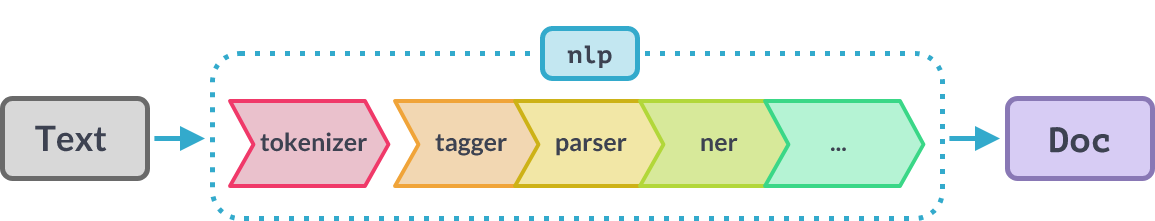



In [2]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


We use load function to load the english language model in a variable. 

1. en_core_web_sm: English multi-task CNN trained on OntoNotes. Size – 11 MB
2. en_core_web_md: English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Size – 91 MB
3. en_core_web_lg: English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Size – 789 MB

In [3]:
import spacy
text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""
nlp = spacy.load("en_core_web_sm")
tk = nlp(text)
print(tk)


When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!


In [4]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [5]:
spacy.tokens.doc.Doc

spacy.tokens.doc.Doc

In [6]:
for token in tk:
  print(token)

When
learning
data
science
,
you
should
n't
get
discouraged
!


Challenges
and
setbacks
are
n't
failures
,
they
're
just
part
of
the
journey
.
You
've
got
this
!


In [7]:
from spacy.lang.en import English
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""
#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)
# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)


['When', 'learning', 'data', 'science', ',', 'you', 'should', "n't", 'get', 'discouraged', '!', '\n', 'Challenges', 'and', 'setbacks', 'are', "n't", 'failures', ',', 'they', "'re", 'just', 'part', 'of', 'the', 'journey', '.', 'You', "'ve", 'got', 'this', '!']


In [8]:
from spacy.lang.en.stop_words import STOP_WORDS
#Implementation of stop words:
filtered_sent=[]
#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)
# filtering stop words
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)


Filtered Sentence: [learning, data, science, ,, discouraged, !, 
, Challenges, setbacks, failures, ,, journey, ., got, !]


In [11]:
# Implementing lemmatization
nlp =spacy.load('en_core_web_sm')
text = (u'''They were walking in the garden when the earthquake hit the town. 
I had gone to the station. 
She is standing in the queue. 
It is raining outside''')
lem = nlp(text)
#find lemma for each word

for word in lem:
  print(word.text, word.lemma_)

They -PRON-
were be
walking walk
in in
the the
garden garden
when when
the the
earthquake earthquake
hit hit
the the
town town
. .

 

I -PRON-
had have
gone go
to to
the the
station station
. .

 

She -PRON-
is be
standing stand
in in
the the
queue queue
. .

 

It -PRON-
is be
raining rain
outside outside


In [13]:
lem = nlp(u"computer computers computed computing computes")

for word in lem:
  print(word.text, word.lemma_)

computer computer
computers computer
computed compute
computing computing
computes compute


In [14]:
text = ('''They were walking in the garden when the earthquake hit the town. 
I had gone to the station. 
She is standing in the queue. 
It is raining outside''')

doc = nlp(text)

#analyze
print("Noun phrase: ",[chunk.text for chunk in doc.noun_chunks])

Noun phrase:  ['They', 'the garden', 'the earthquake', 'the town', 'I', 'the station', 'She', 'the queue', 'It']


In [15]:
print(doc)

They were walking in the garden when the earthquake hit the town. 
I had gone to the station. 
She is standing in the queue. 
It is raining outside


In [16]:
# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")

doc = nlp(text)

print("Verbs : ",[token.lemma_ for token in doc if token.pos_ == "VERB"])

Verbs :  ['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'talk', 'say']


In [17]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Sebastian NORP
Google ORG
2007 DATE
American NORP
Recode ORG
earlier this week DATE


In [19]:
#POS

for word in doc:
  print(word.text, word.pos_)

When ADV
Sebastian PROPN
Thrun PROPN
started VERB
working VERB
on ADP
self NOUN
- PUNCT
driving VERB
cars NOUN
at ADP
Google PROPN
in ADP
2007 NUM
, PUNCT
few ADJ
people NOUN
outside ADV
of ADP
the DET
company NOUN
took VERB
him PRON
seriously ADV
. PUNCT
“ PUNCT
I PRON
can VERB
tell VERB
you PRON
very ADV
senior ADJ
CEOs NOUN
of ADP
major ADJ
American ADJ
car NOUN
companies NOUN
would VERB
shake VERB
my DET
hand NOUN
and CCONJ
turn VERB
away ADV
because SCONJ
I PRON
was AUX
n’t PART
worth ADJ
talking VERB
to ADP
, PUNCT
” PUNCT
said VERB
Thrun PROPN
, PUNCT
in ADP
an DET
interview NOUN
with ADP
Recode PROPN
earlier ADV
this DET
week NOUN
. PUNCT


# **Entity detection**

Entity detection, also called entity recognition, is a more advanced form of language processing that identifies important elements like places, people, organizations, and languages within an input string of text. This is really helpful for quickly extracting information from text, since you can quickly pick out important topics or identify key sections of text.


In [20]:
from spacy.lang.en import English
import en_core_web_sm
from spacy import displacy

nlp = en_core_web_sm.load()

nytimes= nlp(u"""New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, 
becoming the latest national flash point over refusals to inoculate against dangerous diseases.
At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. 
The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday.
The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, 
to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.""")

entities=[(token, token.label_, token.label) for token in nytimes.ents]
print(entities)

[(New York City, 'GPE', 384), (Tuesday, 'DATE', 391), (At least 285, 'CARDINAL', 397), (September, 'DATE', 391), (Brooklyn, 'GPE', 384), (Williamsburg, 'GPE', 384), (four, 'CARDINAL', 397), (Bill de Blasio, 'PERSON', 380), (Tuesday, 'DATE', 391), (Orthodox, 'NORP', 381), (Jews, 'NORP', 381), (as young as 6 months old, 'DATE', 391), (up to $1,000, 'MONEY', 394)]


# **Dependency Parsing**

Dependency parsing is a language processing technique that allows us to better determine the meaning of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other.

In [21]:
for chunk in nytimes.noun_chunks:
  #print(chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text)
   print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)
displacy.render(nytimes, style="ent", jupyter=True)


New York City City nsubj declared
Tuesday Tuesday pobj on
a public health emergency emergency dobj declared
mandatory measles vaccinations vaccinations dobj ordered
an outbreak outbreak pobj amid
the latest national flash point point attr becoming
refusals refusals pobj over
dangerous diseases diseases pobj against
At least 285 people people nsubj contracted
measles measles dobj contracted
the city city pobj in
September September pobj since
Brooklyn’s Williamsburg neighborhood neighborhood pobj in
The order order nsubj covers
four Zip codes codes dobj covers
Mayor Bill de Blasio Blasio nsubj said
(D D appos Blasio
The mandate orders orders ROOT orders
all unvaccinated people people dobj orders
the area area pobj in
a concentration concentration pobj including
Orthodox Jews Jews pobj of
inoculations inoculations dobj receive
children children pobj for
Anyone Anyone nsubjpass fined
who who nsubj resists


In [22]:
from spacy import displacy

text = "When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously."

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style="dep", jupyter="True")

# **Text classification using Spacy**

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
df_amazon = pd.read_csv("amazon_alexa.tsv", sep="\t")
df_amazon.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [24]:
df_amazon.shape
df_amazon.info()
df_amazon.feedback.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


1    2893
0     257
Name: feedback, dtype: int64

In [25]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words and punctuiations
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}
# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

from sklearn.model_selection import train_test_split

X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])
# model generation
pipe.fit(X_train,y_train)

from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))


Logistic Regression Accuracy: 0.944973544973545
Logistic Regression Precision: 0.954248366013072
Logistic Regression Recall: 0.9887133182844243
